# CHAPTER 27: Mean-Square-error Inference

### This code plots Figure 8 in the chapter from Chapter 27: Mean-Square-Error Inference (vol II)

TEXT: A. H. Sayed, INFERENCE AND LEARNING FROM DATA, Cambridge University Press, 2022.

<div style="text-align: justify">
DISCLAIMER:  This computer code is  provided  "as is"   without  any  guarantees.
Practitioners  should  use it  at their own risk.  While  the  codes in  the text 
are useful for instructional purposes, they are not intended to serve as examples 
of full-blown or optimized designs. The author has made no attempt at optimizing 
the codes, perfecting them, or even checking them for absolute accuracy. In order 
to keep the codes at a level  that is  easy to follow by students, the author has 
often chosen to  sacrifice  performance or even programming elegance in  lieu  of 
simplicity. Students can use the computer codes to run variations of the examples 
shown in the text. 
</div>

The Jupyter notebook and python codes are developed by Semanur Avşar 

## 2D Gaussian distribution

Figure $17.8$ plots a typical joint Gaussian distribution for scalar variables $\{\mathcal{x},\mathcal{y}\}$ for illustration purposes, along with its contour curves using 
$$\bar{x}=3,\;\;\bar{y}=4,\;\;R=\begin{bmatrix}2&1\\1&4\end{bmatrix}$$
The figure also shows the individual Gaussian distributions for the variables $\mathcal{x}$ and $\mathcal{y}$ separately.

parameters for Gaussian function:
[3, 4]
[[2 1]
 [1 4]]


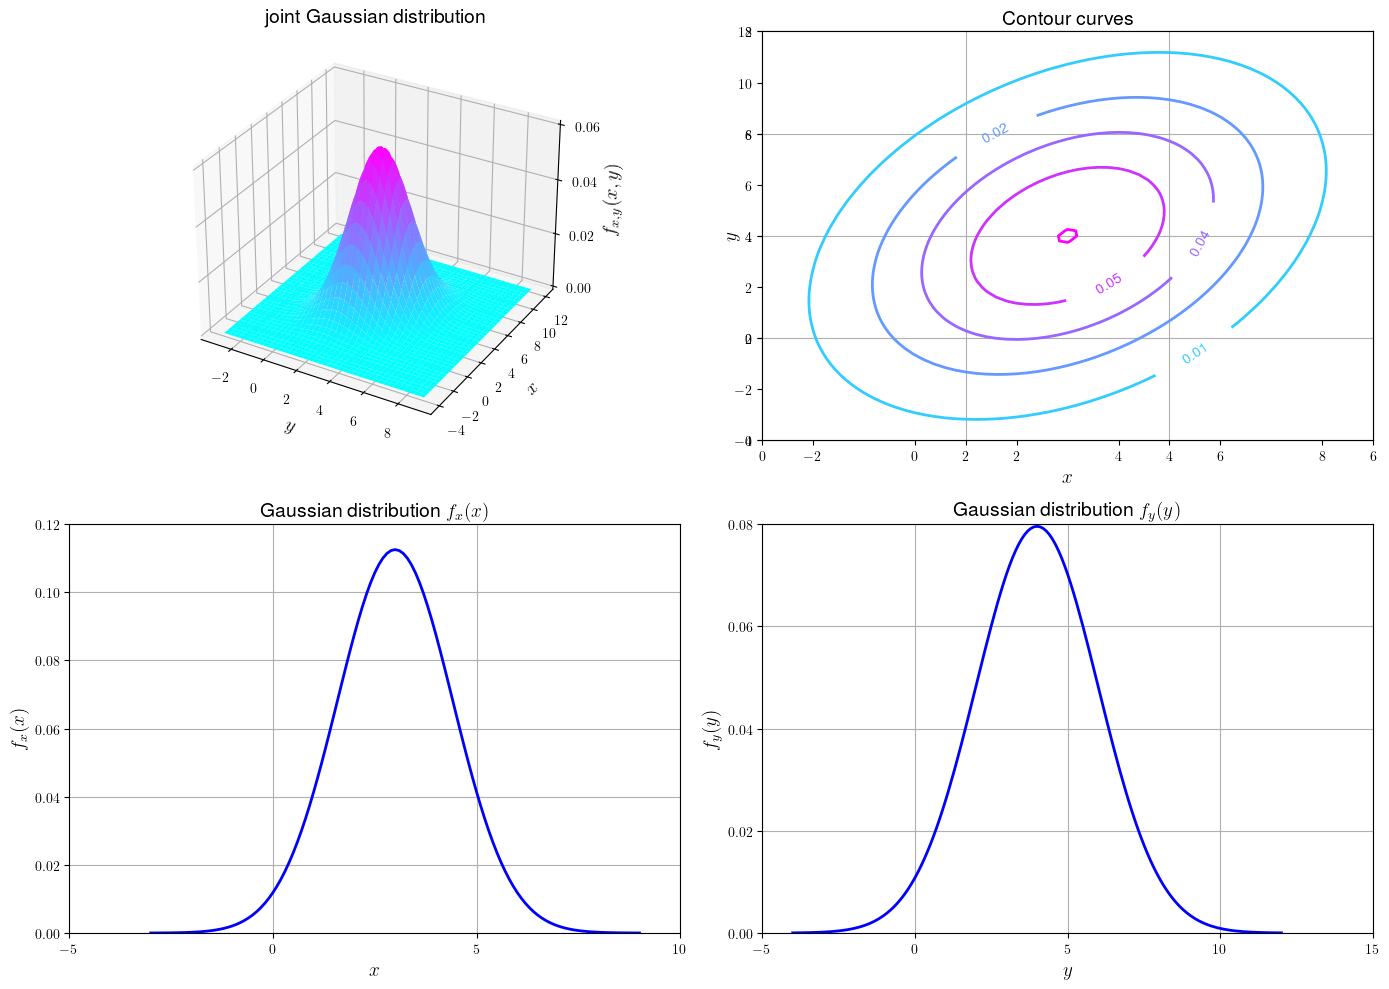

In [8]:
import numpy as np
import matplotlib.pyplot as plt

xbar = 3 # mean of x
ybar = 4 # mean of y
sigma_x_sq = 2 # variance of x
sigma_y_sq = 4 # variance of y
sigma_x_y =  1 # cross-correlation

R = np.array([ [sigma_x_sq, sigma_x_y], 
              [sigma_x_y, sigma_y_sq]])

k=0
step=0.1
fx = np.zeros(int((9 - (-3)) / step +1))
g = np.zeros([int((9 - (-3)) / step +1), int((12 - (-4)) / step +1)])
for x in np.arange(-3,9+step,step):
    m=0
    a = (1/(2*np.pi))*1/(np.sqrt(sigma_x_sq))
    b = -0.5*(x-xbar)**2/sigma_x_sq
    fx[k]=a*np.exp(b)
    
    for y in np.arange(-4,12+step,step):
       a = (1/(2*np.pi))*(1/(np.sqrt(np.linalg.det(R))))
       z = np.array([x-xbar, y-ybar])
       b = -0.5*z @ np.linalg.inv(R) @ z.T
       g[k,m] = a*np.exp(b)
       m = m+1
    k=k+1

m=0
fy = np.zeros(int((12 - (-4)) / step +1))
for y in np.arange(-4,12+step,step):
    a = (1/(2*np.pi))*1/(np.sqrt(sigma_y_sq))
    b = -0.5*(y-ybar)**2/sigma_y_sq
    fy[m]=a*np.exp(b)
    m=m+1

y=5
sigma2= sigma_x_sq - ((sigma_x_y)**2/sigma_y_sq)
mean = xbar + (sigma_x_y/sigma_y_sq)*(y-ybar)

m=0
fc = np.zeros(int((9 - (-3)) / step +1))
for x in np.arange(-3,9,step):
    a = (1/(2*np.pi))*1/(np.sqrt(sigma2))
    b = -0.5*(x-mean)**2/sigma2
    fc[m]=a*np.exp(b);  
    m=m+1

print('parameters for Gaussian function:')
print([xbar, ybar])
print(R)

#figure 8 (2D Gaussian distribution and contours)

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

# Plotting the figures
fig = plt.figure(figsize=(14, 10))

# 3D Plot
ax1 = fig.add_subplot(2, 2, 1, projection='3d')
xx = np.arange(-3.0, 9.0 +step, step)
yy = np.arange(-4.0, 12.0 +step, step)
X, Y = np.meshgrid(xx, yy)
Z = g.T
ax1.plot_surface(X, Y, Z, cmap='cool')
ax1.set_zticks(np.arange(0, 0.07, 0.02))
ax1.set_xlabel('$$y$$', fontsize=14)
ax1.set_ylabel('$$x$$', fontsize=14)
ax1.set_zlabel('$$f_{x,y}(x,y)$$', fontsize=14)
ax1.set_title('joint Gaussian distribution', fontsize=14)

# Contour Plot
xx = np.arange(-3, 9+ step, step)
yy = np.arange(-4, 12 +step, step)
X, Y = np.meshgrid(xx, yy)

ax2 = fig.add_subplot(2, 2, 2)
contour_plot = ax2.contour(X, Y, g.T, 10, cmap='cool', linewidths=1)

# Display text labels indicating the value of each contour line
ax2.clabel(contour_plot, fontsize=10, fmt='%1.2f')

# Select only the labels at every second contour line
selected_contours = contour_plot.levels[::2]

ax2 = fig.add_subplot(2, 2, 2)
# Create a new contour plot with the reduced number of contour levels
new_contour_plot = ax2.contour(X, Y, g.T, selected_contours, cmap='cool', linewidths=2)
ax2.clabel(new_contour_plot, fontsize=10, fmt='%1.2f')
ax2.set_xlabel(r'$x$', fontsize=14)
ax2.set_ylabel(r'$y$', fontsize=14)
ax2.set_title('Contour curves', fontsize=14)

# Add grid and set the axis limits
ax2.grid()
ax2.axis([0, 6, 0, 8])
ax2.set_xticks(np.arange(0, 7, 2))
ax2.set_yticks(np.arange(0, 9, 2))
ax2.set_xlim([0,6])
ax2.set_ylim([0,8])

# 2D Plot (First)
ax3 = fig.add_subplot(2, 2, 3)
x = np.arange(-3.0, 9.0 +step, step)
ax3.plot(x, fx, '-b', linewidth = 2)
ax3.set_xlabel(r'$x$', fontsize=14)
ax3.set_ylabel(r'$f_{x}(x)$', fontsize=14)
normal_text = "Gaussian distribution"
latex_expression = r'$f_{x}(x)$'
title_text = normal_text + " " + latex_expression
ax3.set_title(title_text, fontsize=14)
ax3.grid()
ax3.set_xticks(np.arange(-5, 11, 5))
ax3.set_yticks(np.arange(0, 0.13, 0.02))
ax3.set_xlim([-5,10])
ax3.set_ylim([0,0.12])

# 2D Plot (Second)
ax4 = fig.add_subplot(2, 2, 4)
xx = np.arange(-4.0, 12.0 +step, step)
ax4.plot(xx, fy, '-b', linewidth = 2)
ax4.set_xlabel(r'$y$', fontsize=14)
ax4.set_ylabel(r'$f_{y}(y)$', fontsize=14)
latex_expression = r'$f_{y}(y)$'
title_text = normal_text + " " + latex_expression
ax4.set_title(title_text, fontsize=14)
ax4.grid()
ax4.set_xticks(np.arange(-5, 16, 5))
ax4.set_yticks(np.arange(0, 0.09, 0.02))
ax4.set_xlim([-5,15])
ax4.set_ylim([0,0.08])

plt.tight_layout()
plt.show()

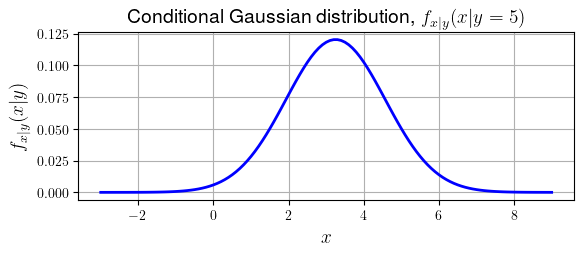

y and conditional mean and variance:
y: 5, mean: 3.25, variance: 1.75


In [5]:
x = np.arange(-3, 9 + step, step)

# Plot the conditional Gaussian distribution
plt.figure()

plt.subplot(2, 1, 1)
plt.plot(x, fc, 'b', linewidth = 2)
plt.xlabel(r'$x$', fontsize=14)
plt.ylabel(r'$f_{x|y}(x|y)$', fontsize=14)
plt.title(r'Conditional Gaussian distribution, $f_{x|y}(x|y=5)$', fontsize=14)
plt.grid()
plt.show()

# Display the values of 'y', conditional mean, and variance
print(f"y and conditional mean and variance:")
print(f"y: {y}, mean: {mean}, variance: {sigma2}")